In [1]:
import keras
import gc

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
data = np.load(r'C:\Users\dpetr\Desktop\sxoli\Level 3\Individual\datasets\GTZAN\features.npz')
labels = data['labels']

In [3]:
mel = data['mel']
mel = np.transpose(mel, (0, 2, 1))
print(mel.shape, mel.dtype, labels.shape, labels.dtype)

(9986, 130, 128) float32 (9986,) int32


In [4]:
mfcc = data['mfcc']
mfcc = np.transpose(mfcc, (0, 2, 1))
print(mfcc.shape, mfcc.dtype, labels.shape, labels.dtype)

(9986, 130, 20) float32 (9986,) int32


In [5]:
def prepare_datasets(x, y, test_size, validation_size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, stratify=y)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=validation_size, stratify=y_train)
    return x_train, x_test, x_validation, y_train, y_test, y_validation

x_train, x_test, x_validation, y_train, y_test, y_validation = prepare_datasets(mfcc, labels, test_size=1500, validation_size=1500)

In [6]:
print("X shape: ", x_train.shape, x_validation.shape, x_test.shape)
print("Y shape: ", y_train.shape, y_validation.shape, y_test.shape)

X shape:  (6986, 130, 20) (1500, 130, 20) (1500, 130, 20)
Y shape:  (6986,) (1500,) (1500,)


In [7]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
x_validation = (x_validation - mean) / std

Text(0, 0.5, 'Frequency')

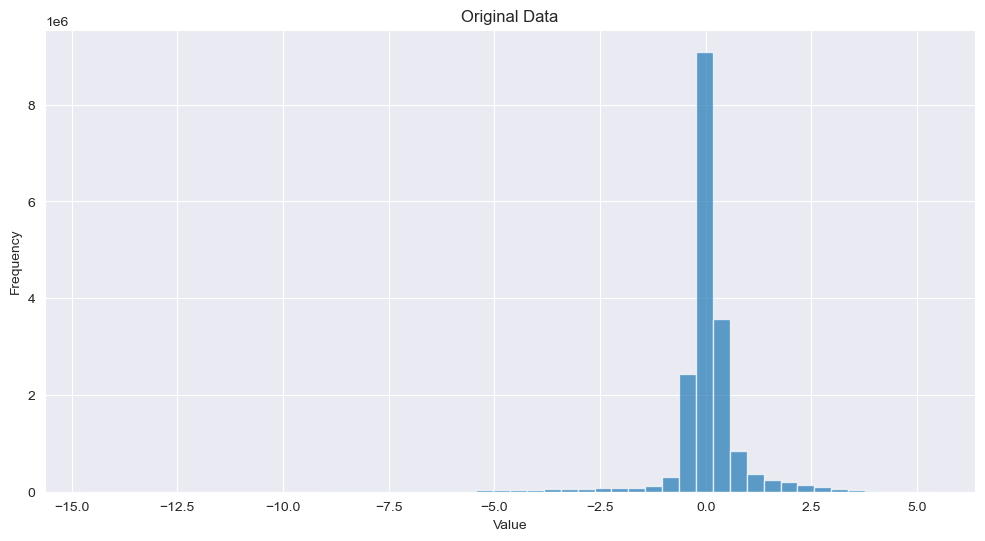

In [12]:
plt.figure(figsize=(12, 6))
plt.title("Original Data")
plt.hist(x_train.flatten(), bins=50, alpha=0.7)
plt.xlabel("Value", )
plt.ylabel("Frequency")

In [9]:
def build_mel_model(input_shape):
    #create model
    model = keras.Sequential()
    model.add(keras.layers.LSTM(256, input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.00005), recurrent_regularizer=keras.regularizers.l2(0.00005), bias_regularizer=keras.regularizers.l2(0.00005)))

    model.add(keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.000001)))
    model.add(keras.layers.Dropout(0.65))

    #output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [68]:
def build_mfcc_model(input_shape):
    #create model
    model = keras.Sequential()

    model.add(keras.layers.LSTM(128, input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.000005), recurrent_regularizer=keras.regularizers.l2(0.000005), bias_regularizer=keras.regularizers.l2(0.000005)))

    model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00005)))
    model.add(keras.layers.Dropout(0.65))
    #output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [69]:
input_shape = (x_train.shape[1], x_train.shape[2])
# model = build_mel_model(input_shape)
model = build_mfcc_model(input_shape)
optimizer = keras.optimizers.Adam(learning_rate=0.0002) #0.0008 best #0.0003 good #0.0005 best #0.0007 good
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
for layer in range(len(model.layers)):
    print(model.layers[layer].trainable_weights)
    print()

[<tf.Variable 'lstm/lstm_cell/kernel:0' shape=(20, 256) dtype=float32, numpy=
array([[-0.01422767,  0.01156858, -0.08831547, ...,  0.11694527,
        -0.05345751,  0.08766016],
       [-0.13054065, -0.09492946,  0.14671361, ..., -0.04455283,
        -0.11986738, -0.03729902],
       [-0.01189384,  0.11238623, -0.04933643, ..., -0.11154093,
        -0.13013524, -0.03944176],
       ...,
       [-0.11089067,  0.0191533 ,  0.14371598, ..., -0.14581905,
        -0.12444475, -0.06439558],
       [ 0.00882801, -0.07915801, -0.04804445, ..., -0.05909066,
        -0.12574896,  0.11196223],
       [ 0.14137292, -0.06011371,  0.04108499, ...,  0.03492342,
         0.06115589, -0.0151761 ]], dtype=float32)>, <tf.Variable 'lstm/lstm_cell/recurrent_kernel:0' shape=(64, 256) dtype=float32, numpy=
array([[-0.04840243,  0.0760167 ,  0.03258526, ...,  0.03626359,
         0.03588144,  0.12819532],
       [ 0.1033567 , -0.03598142,  0.0544209 , ..., -0.0076587 ,
        -0.09868206, -0.05273538],
     

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                21760     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 31,370
Trainable params: 31,370
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
219/219 [==============================] - 6s 16ms/step - loss: 2.1554 - accuracy: 0.2058 - val_loss: 1.9046 - val_accuracy: 0.3627
Epoch 2/25
219/219 [==============================] - 3s 12ms/step - loss: 1.8599 - accuracy: 0.3457 - val_loss: 1.6614 - val_accuracy: 0.4273
Epoch 3/25
219/219 [==============================] - 3s 12ms/step - loss: 1.7163 - accuracy: 0.3909 - val_loss: 1.5527 - val_accuracy: 0.4473
Epoch 4/25
219/219 [==============================] - 3s 12ms/step - loss: 1.6276 - accuracy: 0.4217 - val_loss: 1.5034 - val_accuracy: 0.4820
Epoch 5/25
219/219 [==============================] - 3s 12ms/step - loss: 1.5683 - accuracy: 0.4423 - val_loss: 1.4724 - val_accuracy: 0.4833
Epoch 6/25
219/219 [==============================] - 3s 12ms/step - loss: 1.5905 - accuracy: 0.4397 - val_loss: 1.4324 - val_accuracy: 0.4967
Epoch 7/25
219/219 [==============================] - 3s 12ms/step - loss: 1.4897 - accuracy: 0.4748 - val_loss: 1.4573 - val_accuracy: 0.5080

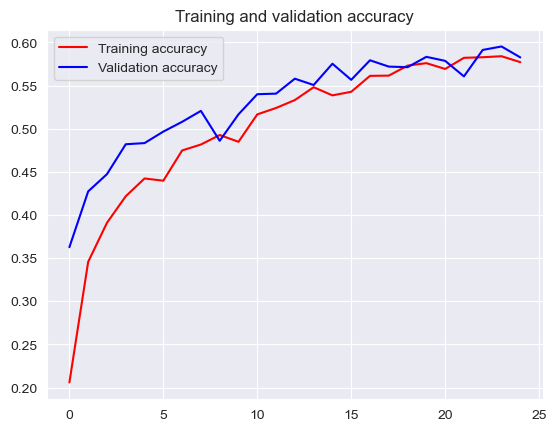

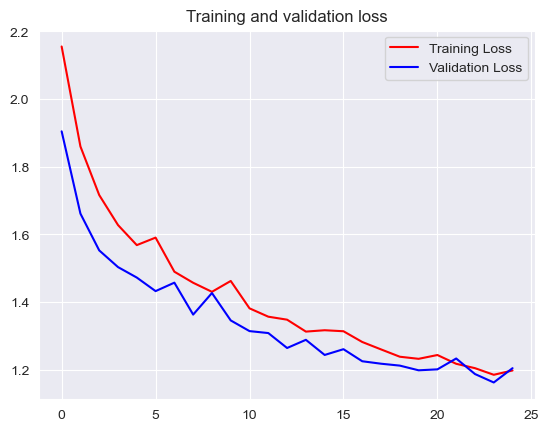

Accuracy on test set is:0.578000009059906


In [71]:
history = model.fit(x_train, y_train,
                    validation_data=(x_validation, y_validation),
                    epochs=25,
                    batch_size=32,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=3,
                                                                verbose=1,
                                                                restore_best_weights=True)]
                    )

test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy' + str())
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

print("Accuracy on test set is:{}".format(test_accuracy))



In [ ]:
# model.save('saved_models/LSTM')

In [9]:
def predict(model,x, y):

    x = x[np.newaxis, ...]
    prediction = model.predict(x)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index:{predicted_index}")

    
x = x_test[55]
y = y_test[55]

lstm_model = tf.keras.models.load_model('saved_models/LSTM')
predict(model, x, y)
predict(lstm_model, x, y)

1/1 [==============================] - 0s 29ms/step
Expected index: 1, Predicted index:[1]
1/1 [==============================] - 1s 607ms/step
Expected index: 1, Predicted index:[1]


In [67]:
del model
keras.backend.clear_session()
gc.collect()

26431

RuntimeError: Physical devices cannot be modified after being initialized